Lasso regression is an adaptation of the popular and widely used linear regression algorithm. It enhances regular linear regression by slightly changing its cost function, which results in less overfit models.

Loss finction:

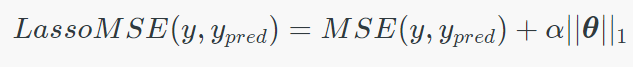

Theta are the coefficients of the linear regression. We are taking mod of it, so unnecessary coefficients will lead to 0 after the Lasso Regression, resulting in a sparse model. This method uses L1 regulariztion.
Full form of Lasso is "Least Absolute Shrinkage and Selection Operator".

When we think in a large dataset, many of the variables are not relevent, then we can use Lasso regression to identify less important features.

Since the lasso penalty consists of the absolute model parameters, large values are not taken into account more strongly than smaller values. This means that our lasso penalty would not prioritize minimizing any particular model parameter, unlike the ridge penalty, which prioritizes large parameters.



# **Advantages and Disadvantages of Lasso Regression**

**Advantages**

In the context of linear regression and machine learning, Lasso Regression, also known as Least Absolute Shrinkage and Selection Operator, has the following benefits:

**Feature Selection**: Lasso Regression has the intrinsic capacity to do feature selection by precisely zeroing out certain of its coefficients. This is one of its main advantages. This produces a sparse model, which streamlines the model and pinpoints the most important predictors. It is very useful when dealing with a huge number of features.

**Prevention of Overfitting**: A regularization term in Lasso Regression penalizes the absolute values of the coefficients. By discouraging too complex models and encouraging a balance between accuracy on the training set and generalization to new data, this regularization helps prevent overfitting.

**Improved Model Interpretability**: In addition to lowering the feature count, Lasso Regression creates sparsity, which improves the interpretability of the model. Understanding the correlations between features and the objective variable is made easier by the non-zero coefficients, which clearly show which predictors in the model have an influence.

**Robustness to Multicollinearity**: When there is multicollinearity (strong correlation between features) among predictor variables, Lasso Regression might be applied. In order to increase the stability and interpretability of the model, it often chooses one variable from a set of highly correlated variables.

**Disadvantages**

While there are many benefits to Lasso Regression, there are also some drawbacks that need to be taken into account:

**Sensitivity to Outliers**: Lasso Regression is susceptible to dataset outliers. An outlier’s disproportionate impact on the regularization term may result in biased feature selection and impair the performance of the model as a whole.

**Selection of Only One Feature from a Group**: When there is a high degree of correlation between the features (multicollinearity), Lasso Regression often chooses one feature at random from a set of associated characteristics. It’s possible that this instability in feature selection won’t provide a logical or consistent outcome.

**Difficulty in Handling Large Numbers of Features**: Although Lasso Regression is capable of feature selection, it may not function well in datasets with a high number of features. For datasets with an excessive number of predictors, the sparsity created by Lasso might not be appropriate.

**Arbitrary Selection of Features**: The model’s interpretation may be difficult due to the arbitrary feature selection, particularly if related features have comparable predictive power. The choice could be influenced by elements like the dataset’s minor modifications or data ordering.

# **Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import random
random.seed(10)
np.random.seed(10)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import warnings
warnings.filterwarnings('ignore')

# **Creating data**

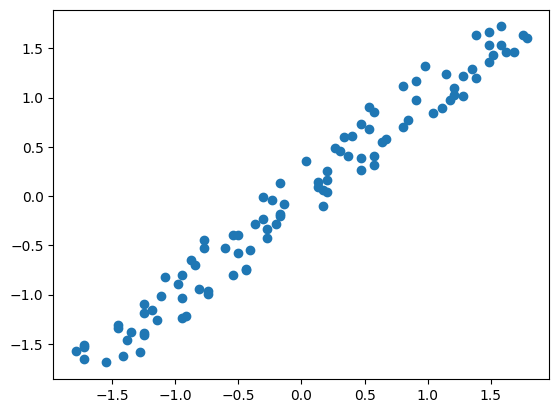

In [19]:
X = np.array([ctr + random.randrange(1, 20) for ctr in np.arange(1, 101, 1)])
scaler = StandardScaler()
X_std = scaler.fit_transform(X.reshape(-1, 1))
y = np.array([(2 * ctr) + random.randrange(1, 5) for ctr in np.arange(1, 101, 1)])
y_std = scaler.fit_transform(y.reshape(-1, 1))
plt.scatter(X_std, y_std)
plt.show()

# **Helper functions**

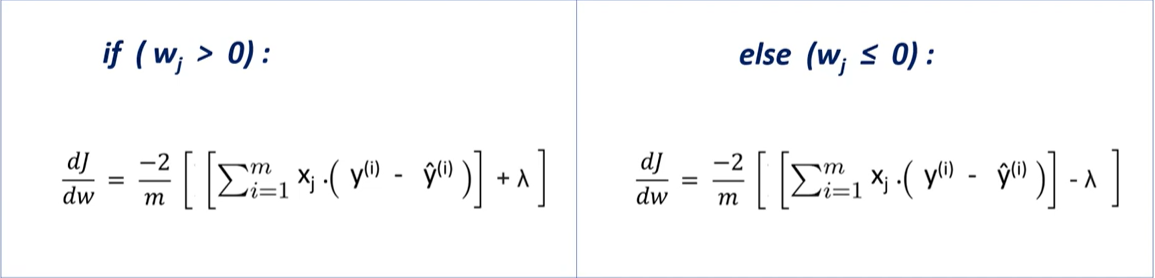

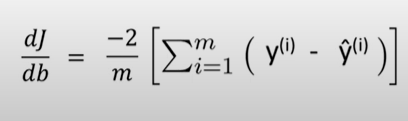

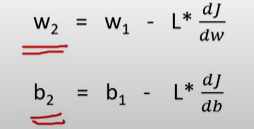

In [20]:
def gradient_descent(curr_w, curr_b, X, y, alpha, penalty):
    numberOf_data_points = len(X)
    if curr_w > 0:
        w_val = (-2 / numberOf_data_points) * (np.sum(X * (y - (curr_w * X + curr_b))) + penalty * curr_w)
    elif curr_w < 0:
        w_val = (-2 / numberOf_data_points) * (np.sum(X * (y - (curr_w * X + curr_b))) - penalty * curr_w)
    else:
        w_val = (-2 / numberOf_data_points) * (np.sum(X * (y - (curr_w * X + curr_b))) - penalty)
    b_val = (-2 / numberOf_data_points) * np.sum((y - (curr_w * X + curr_b)))
    new_w = curr_w - alpha * w_val
    new_b = curr_b - alpha * b_val
    return new_w, new_b

# **Initiations**

In [46]:
w = 0
b = 0
alpha = 0.001
epochs = 10000
penalty = .1

# **Predictions**

In [47]:
for i in range(epochs):
    w, b = gradient_descent(w, b, X_std, y_std, alpha, penalty)
    #print(w, b)
print(b, w)

9.71378533165534e-17 0.9839668585195973


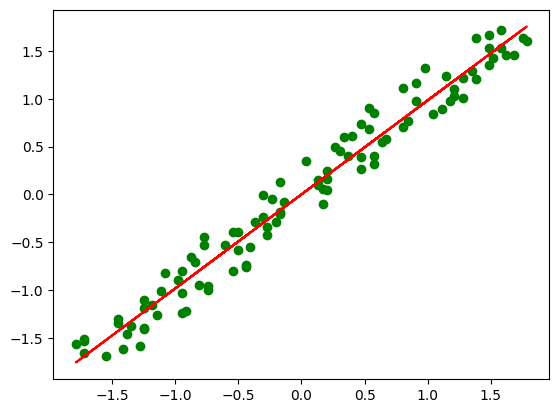

In [48]:
plt.scatter(X_std, y_std, color = 'green')
plt.plot(X_std, w * X_std + b, color = 'red')
plt.show()

0.001 6.80337072761356e-17 0.9819828936871885


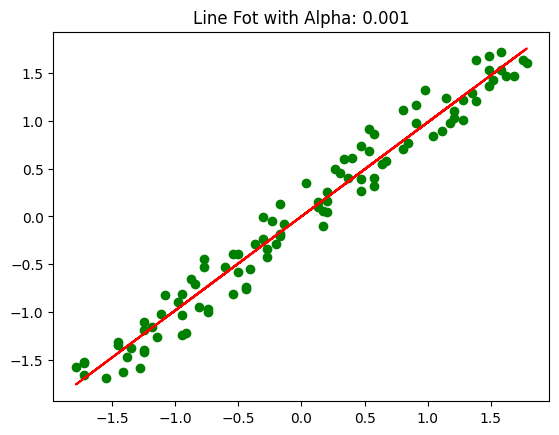

0.01 6.763402698727054e-17 0.9729828936871884


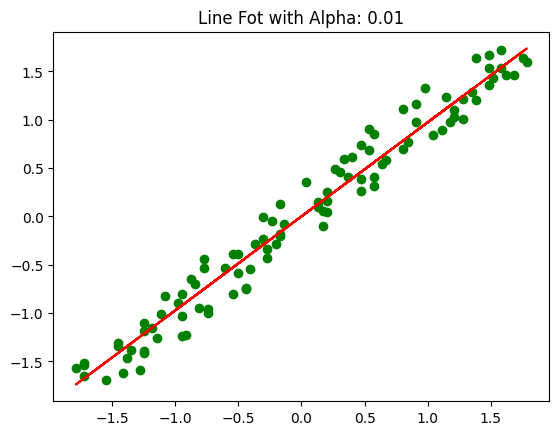

0.1 6.363722409861999e-17 0.8829828936871884


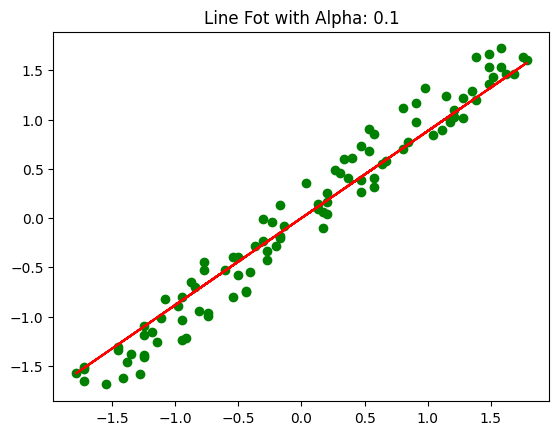

1 2.4424906541753444e-17 0.0


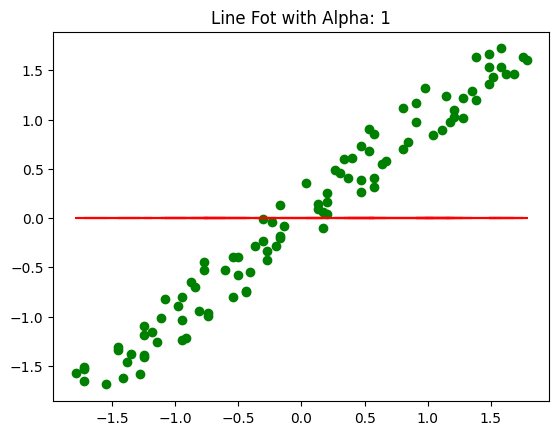

10 2.4424906541753444e-17 0.0


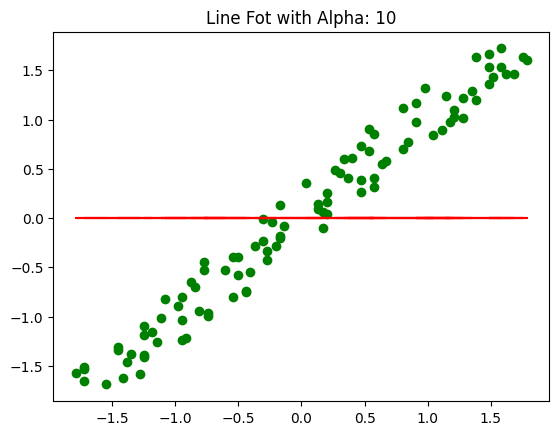

100 2.4424906541753444e-17 0.0


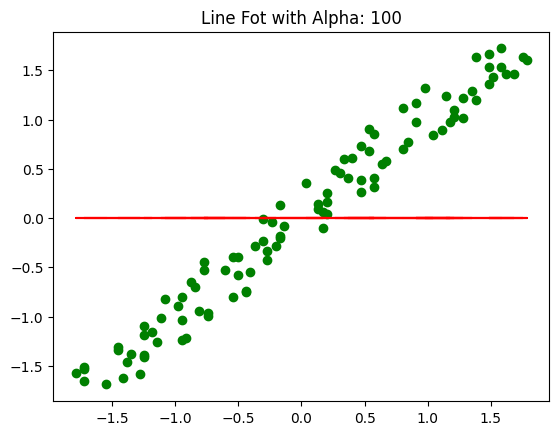

1000 2.4424906541753444e-17 0.0


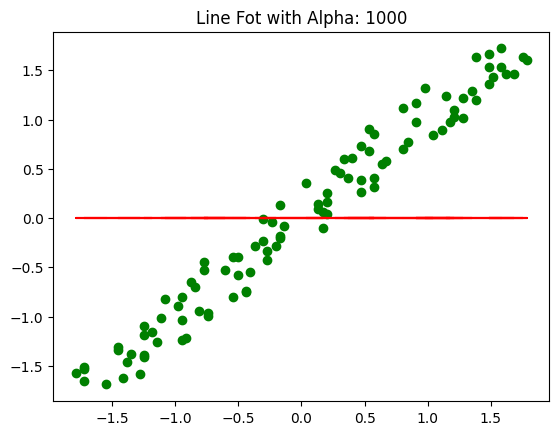

In [45]:
from sklearn.linear_model import Lasso
for alpha in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    model = Lasso(alpha=alpha)
    # fit model
    model.fit(X_std, y_std)
    print(alpha, model.intercept_[0], model.coef_[0])
    plt.scatter(X_std, y_std, color = 'green')
    plt.plot(X_std, model.coef_[0] * X_std + model.intercept_[0], color = 'red')
    plt.title('Line Fot with Alpha: ' + str(alpha))
    plt.show(block = False)

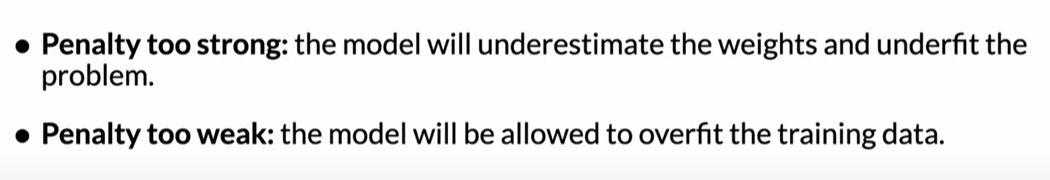

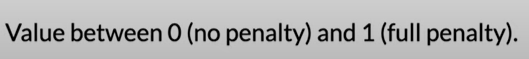